# <center> PREDICTING READMISSION OF DIABETIC PATIENTS</center>

## INTRO BRIEF

 **One of the programs created by Center for Medicare & Medicaid Services(CMS), HRRP, goal is to reduce avoidable readmission of  patients. Hospital Readmission Reduction Program (HRRP), reduces reimbursements to hospitals with higher than average readmissions. Thus, in improving the quality of care of patients, identifying these readmission-high-risk patients and factors that contribute to their readmission using predictive modeling  is of paramount importance. 
  In this work, I will be using a dataset of admitted diabetic patients collected from 130 U.S. hospitals in a period of 10 years(1999-2008).** 
 

### Data Cleaning-Wrangling
#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
import missingno as msno
from library.sb_utils import save_file
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
DM_data = pd.read_csv('../raw_data/diabetic_data.csv')
DM_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#DM_data.info()
DM_data.shape

(101766, 50)

In [6]:
#DM_data.isnull().sum() 

In [10]:
DM_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Checking data types, I see age is object type instead of int or float. But, my source data has age in ranges instead of single values. However, we need to replace the '[]', '()' from the values

In [11]:
DM_data['age'] = DM_data['age'].str.replace('[','').str.replace(')','')

In [12]:
DM_data.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0-10,?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10-20,?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30


In [13]:
DM_data['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Upon observing the weight column, 97% of its values are '?', so I will drop weight column. But before that, I will try to find if other columns have '?' as well.

In [14]:
columns_with_questionmark = []
for col in DM_data.columns: 
    if '?' in DM_data[col].values:
        columns_with_questionmark.append(col)    
print(columns_with_questionmark)    

['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


In [15]:
#calculating percentage of '?' values in columns where it is found.
col_names = ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
cols = {}
for col in col_names:
    length = len(DM_data[DM_data[col] == '?'])
    per = length / DM_data.shape[0] * 100
    cols[col] = per
#print(cols)  
df = pd.DataFrame(cols.items(), columns = ['column_name', '% of \" ?\"'])
df.sort_values(by = '% of \" ?\"', ascending=False)

,column_name,"% of "" ?"""
1,weight,96.858479
3,medical_specialty,49.082208
2,payer_code,39.557416
0,race,2.233555
6,diag_3,1.398306
5,diag_2,0.351787
4,diag_1,0.020636


Here I see "payer_code", "medical_specialty", and  "weight" have more than 39% of their values as "?".
So I drop those columns

In [16]:
DM_data.drop(['payer_code','medical_specialty', 'weight'], axis =1,inplace=True)

In [17]:
DM_data.shape

(101766, 47)

Next, I replaced the "?", in the rest of data with np.nan so we can better visualize missing values and correlation among 
other missing values using missingno package

In [18]:
DM_data = DM_data.replace('?', np.nan)
#DM_data.head()

In [26]:
#msno.bar(DM_data);

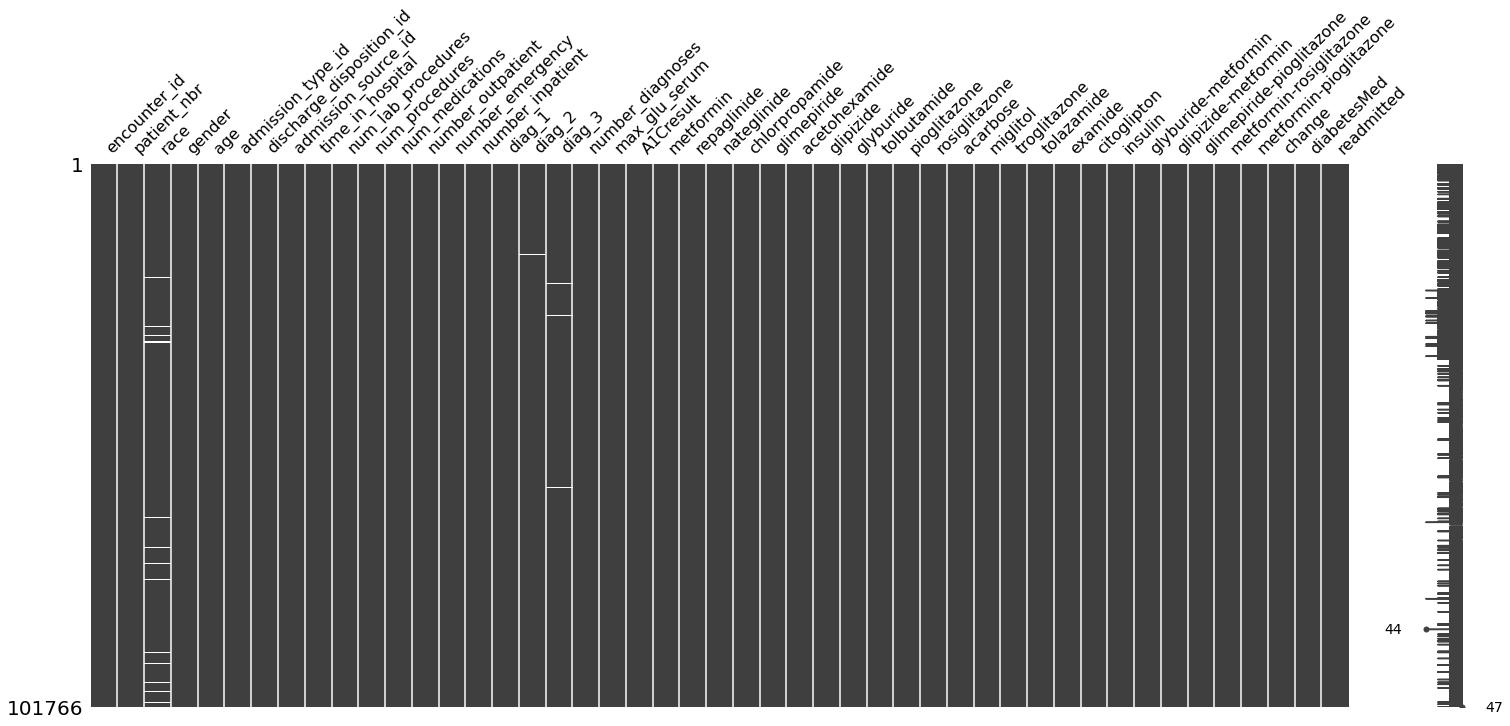

In [23]:
msno.matrix(DM_data);

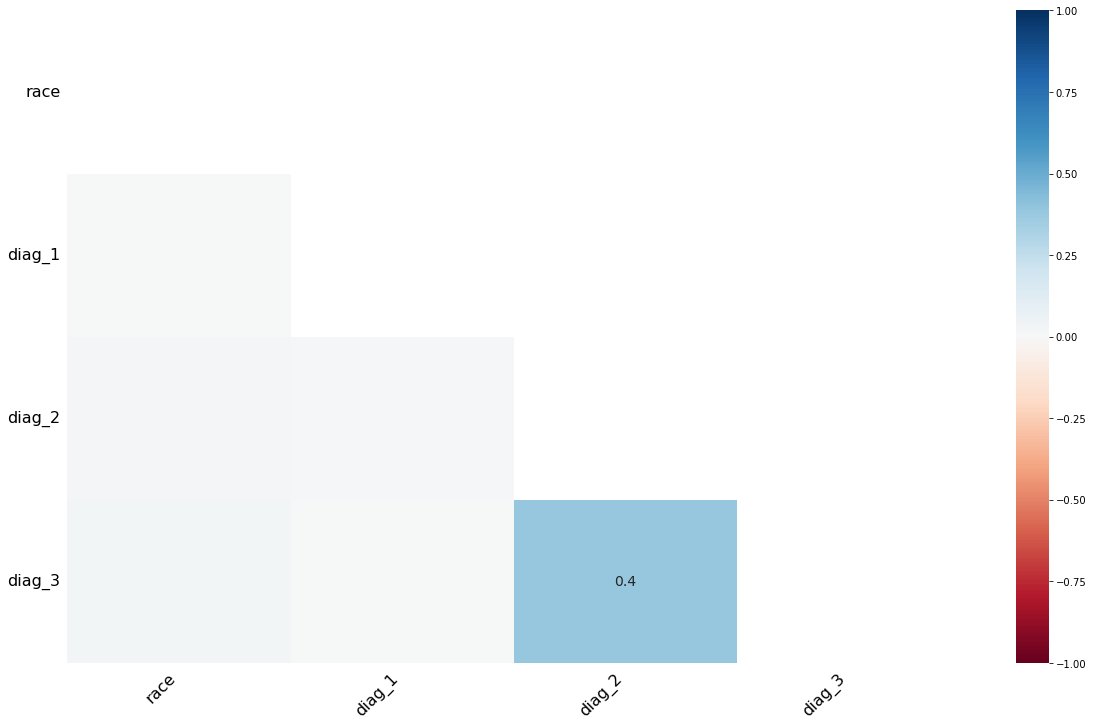

In [21]:
msno.heatmap(DM_data);

The missing values do not seem to have strong correlations, though diag_2 and 3 seem to have slight corr (0.4)

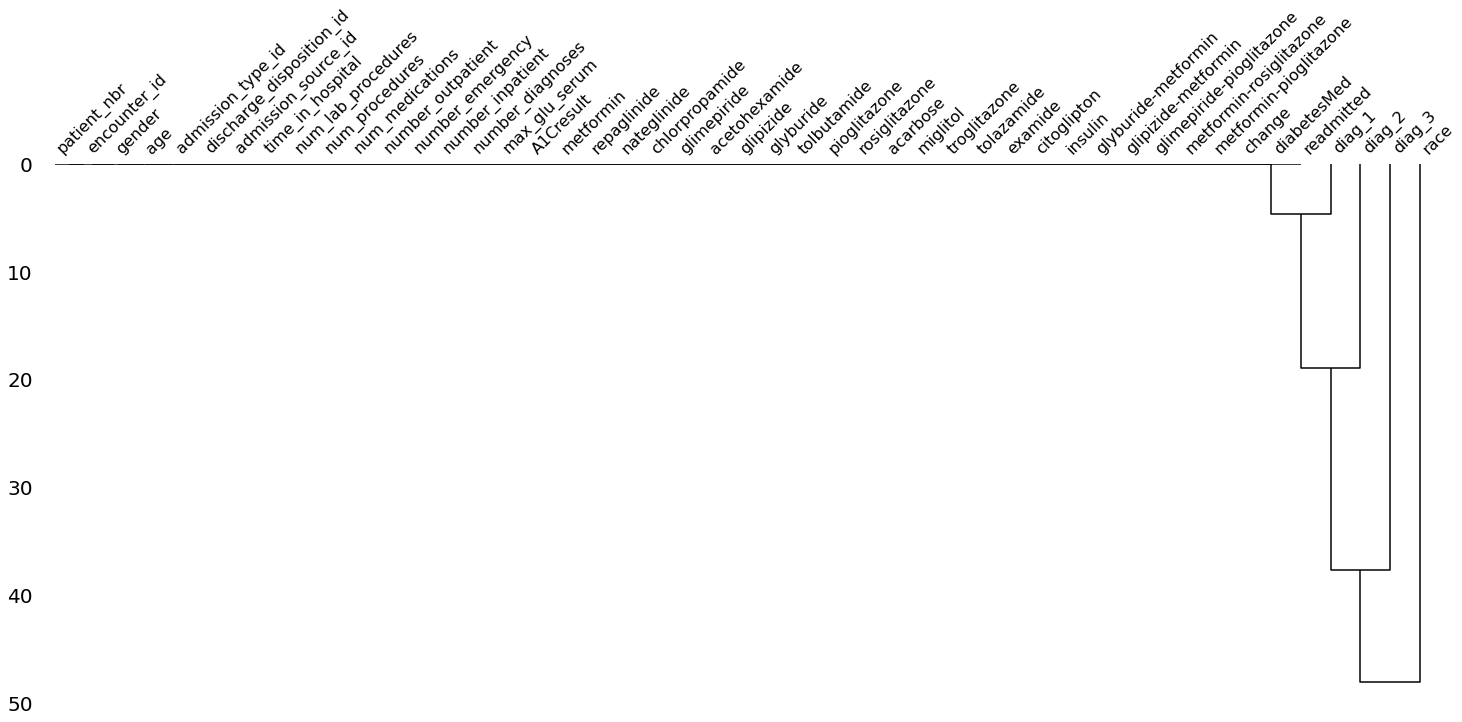

In [25]:
msno.dendrogram(DM_data);

From the missing data values, we see that diag_1, 2 and 3 and "race" have missing values. These missing values seem 
to follow missing at completely random pattern (MCAR), as each do not seem to be correlated with each other and there are few of them so I will drop them.

In [27]:
missing = DM_data[['race','diag_1','diag_2','diag_3']].isnull().sum()*100 /len(DM_data)
missing_Df = pd.DataFrame({'% of missing': missing}).sort_values('% of missing', ascending=False)
missing_Df

,% of missing
race,2.233555
diag_3,1.398306
diag_2,0.351787
diag_1,0.020636


In [28]:
DM_data.shape

(101766, 47)

In [29]:
DM = DM_data.dropna()

In [30]:
DM.shape

(98053, 47)

# Exploratory Data Analysis

When giving my data set a quick glance, I see that the drugs section is filled with lots of 'No's. It seems as though none or most of the drugs were not given. Let me look deeper and at times as in the example below for examide, some particular drugs were either not given at all or adminstered in less than 20% cases.

In [32]:
DM['examide'].value_counts(normalize=True).loc[lambda x: x >0.8] 

No    1.0
Name: examide, dtype: float64

In [33]:
DM['examide'].value_counts().to_frame()

,examide
No,98053


In more than 80% cases, examide was not given. Actually none of the patients were given examide. Let me see which other drugs were not given in more than 80% cases.

In [24]:
#DM['insulin'].value_counts(normalize=True)

In [25]:
meds_cols = DM.columns[21:44]  #selecting the features of the medications/drugs
#meds_cols

drugs_not_given_inmorethan_80 = {}
for col in meds_cols:
    drugs_not_given_inmorethan_80[col] = DM[col].value_counts(normalize=True)
#.loc[lambda x: x > 0.8]
drugs_not_given = pd.DataFrame(drugs_not_given_inmorethan_80)
drugs_not_given.T

,Down,No,Steady,Up
metformin,0.005619,0.803729,0.180280,0.010372
repaglinide,0.000459,0.984468,0.013982,0.001091
nateglinide,0.000112,0.992953,0.006700,0.000235
chlorpropamide,0.000010,0.999154,0.000775,0.000061
glimepiride,0.001877,0.949140,0.045771,0.003213
acetohexamide,NaN,0.999990,0.000010,NaN
glipizide,0.005517,0.874721,0.112092,0.007669
glyburide,0.005487,0.895353,0.091094,0.008067
tolbutamide,NaN,0.999776,0.000224,NaN
pioglitazone,0.001173,0.927611,0.068902,0.002315


Drugs such as metformin-pioglitazone, examide and citoglipton were not given to any patient. In fact, except metformin,which was (given,kept steady or dosage changed) to ~20% of patients, and insulin ( to ~53%), most drugs were not given in 99% of encounters. These features' variance is low to help me in my work. However, I will keep those that were given to at least 87% of patients and drop the rest. I might get something interesting patterns when we visualize these against our target value. 

Insulin was adminstered to ~ 53% of the patients. Now, let's find out if the rest of the patients that 
did not get insulin (47%), received something or nothing while at the hospital.

In [34]:
DM_drugs = DM[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]

Du = DM_drugs.replace(['No', 'Up'], [0,1]).replace(['No', 'Down'], [0,1]).replace(['No', 'Steady'], [0,1])

Du['sum'] = Du.sum(axis=1)

Du['sum'].value_counts()

1    45447
0    22702
2    21057
3     7485
4     1300
5       57
6        5
Name: sum, dtype: int64

Here I can see 22,702 encounters did not receive nor did they have dosage change (up,down,steady) in any drug( assuming they all are unique patients for now)

In [35]:
DM_ones = Du[Du['sum'] == 1]
DM_ones.sum()

metformin                    4339
repaglinide                   379
nateglinide                   149
chlorpropamide                 57
glimepiride                  1289
acetohexamide                   0
glipizide                    3775
glyburide                    3267
tolbutamide                    13
pioglitazone                 1309
rosiglitazone                1022
acarbose                       35
miglitol                        8
troglitazone                    0
tolazamide                     19
examide                         0
citoglipton                     0
insulin                     29591
glyburide-metformin           193
glipizide-metformin             2
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
sum                         45447
dtype: int64

Earlier I found metformin-rosiglitazone, citoglipton, examide with normalized value_counts value of 1 for "No" which meant those drugs were not adminstered at all. However, when summing along columns and rows of our DM_ones df, glimepiride-pioglitazone, metformin-pioglitazone, troglitazone,acetohexamide came out to be 0. Let's see unique value_counts of these four.

In [36]:
four_drugs = ['glimepiride-pioglitazone', 'metformin-pioglitazone', 'troglitazone', 'acetohexamide']

conf_drugs = {}
for drg in four_drugs:
    conf_drugs[drg] = DM_drugs[drg].value_counts(normalize=True)

conf_drgs = pd.DataFrame(conf_drugs)
conf_drgs.T

,No,Steady
glimepiride-pioglitazone,0.999990,0.000010
metformin-pioglitazone,0.999990,0.000010
troglitazone,0.999969,0.000031
acetohexamide,0.999990,0.000010


I can see here that these four were kept steady in tiny portion of the data. We can drop the drugs that were never adminstered. Moreover, I will experiment later on if dropping the drugs that were kept steady only once makes difference in my model. For example, acetohexamide was kept steady along with insulin as the cell result below shows.

In [38]:
acet = DM_drugs[DM_drugs['acetohexamide'] == 'Steady']  
acet

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
26086,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No


In [39]:
DM = DM.drop(['metformin-rosiglitazone','citoglipton', 'examide'], axis =1)

In [40]:
DM.shape
#DM.info()

(98053, 44)

The other two columns I want to investigate are max_glu_serum and A1Cresult as their values are dominated by 
'None',which means these measurements were not taken on the patients.

In [33]:
DM['A1Cresult'].value_counts(normalize=True).to_frame()

,A1Cresult
None,0.834855
>8,0.077825
Norm,0.049504
>7,0.037816


In [34]:
DM['max_glu_serum'].value_counts(normalize=True).to_frame()

,max_glu_serum
None,0.946886
Norm,0.025823
>200,0.014778
>300,0.012514


Will need to experiment if including these two columns, max_glu_serum andA1Cresult, makes difference in model performance.

Let me investigate encounter_id and patient_nbr counts

In [35]:
DM['encounter_id'].nunique()

98053

In [36]:
DM['patient_nbr'].nunique()

68630

Here I see that encounter_id matches the number of rows we have in our df, however, patient_nbr does not and it is lower. This indicates there were patients that had multiple hospital visits.

Let me make a smaller df with patient identifiers like race and gender along with encounter_id and patient_nbr and investigate this further.

In [42]:
DM_eprg = DM[['encounter_id','patient_nbr','race','gender']] #eprg fot encounter,patient,race and gender
DM_eprg.head()

,encounter_id,patient_nbr,race,gender
1,149190,55629189,Caucasian,Female
2,64410,86047875,AfricanAmerican,Female
3,500364,82442376,Caucasian,Male
4,16680,42519267,Caucasian,Male
5,35754,82637451,Caucasian,Male


In [43]:
patient = DM_eprg.groupby('patient_nbr').count()
patient.head()

,encounter_id,race,gender
patient_nbr,,,
135,2,2,2
378,1,1,1
729,1,1,1
774,1,1,1
927,1,1,1


Above, I can see that, for instance, patient_nbr 135 has two encounter_ids, meaning a couple of visits. I will filter out the ones with multiple visits and analyze the data for cleanliness. Let me find one more patient with more than two encounters. Example below illustrates that.

In [32]:
DM[DM['patient_nbr'] == 328887]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
918,7062552,328887,Caucasian,Male,50-60,6,25,1,3,51,0,14,0,0,1,786,425,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
2027,13067634,328887,Caucasian,Male,50-60,1,1,7,2,46,0,20,0,0,2,786,425,428,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
2755,17701176,328887,Caucasian,Male,50-60,1,1,7,4,36,3,14,0,0,3,414,411,428,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
3642,22086186,328887,Caucasian,Male,50-60,1,1,7,2,44,0,14,0,0,4,414,411,425,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
8463,38243124,328887,Caucasian,Male,60-70,1,1,7,2,49,0,19,0,0,4,428,250.83,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
10340,43891170,328887,Caucasian,Male,60-70,1,1,7,1,40,0,13,0,0,5,786,250.01,780,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
12331,50281458,328887,Caucasian,Male,60-70,1,1,7,7,56,1,19,0,0,5,786,428,707,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30
13741,54260868,328887,Caucasian,Male,60-70,1,1,7,4,66,2,15,0,0,5,996,599,715,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,NO


In [44]:
DM_eprg[DM_eprg['patient_nbr'] == 328887] #eg,patient with patient_nbr 328887 had 13 encounters in this df.

,encounter_id,patient_nbr,race,gender
918,7062552,328887,Caucasian,Male
2027,13067634,328887,Caucasian,Male
2755,17701176,328887,Caucasian,Male
3642,22086186,328887,Caucasian,Male
8463,38243124,328887,Caucasian,Male
10340,43891170,328887,Caucasian,Male
12331,50281458,328887,Caucasian,Male
13741,54260868,328887,Caucasian,Male


In [45]:
repeat_patients = patient[patient['encounter_id'] != 1]
single_vist = patient[patient['encounter_id'] == 1]
repeat_patients.head()

,encounter_id,race,gender
patient_nbr,,,
135,2,2,2
1152,3,3,3
1314,3,3,3
5220,4,4,4
5337,2,2,2


In [41]:
repeat_patients[repeat_patients['race']==39] #and patient_nbr 88785891 had 39 encoutners

,encounter_id,race,gender
patient_nbr,,,
88785891,39,39,39


In [42]:
repeat_p = DM_eprg[DM_eprg['patient_nbr'].isin(repeat_patients.index)].drop_duplicates(subset=['patient_nbr']
                                                                                     ,keep='first')
single_p = DM_eprg[DM_eprg['patient_nbr'].isin(single_vist.index)].drop_duplicates(subset=['patient_nbr']
                                                                                     ,keep='first')
single_p['encounter_id'].nunique()

52350

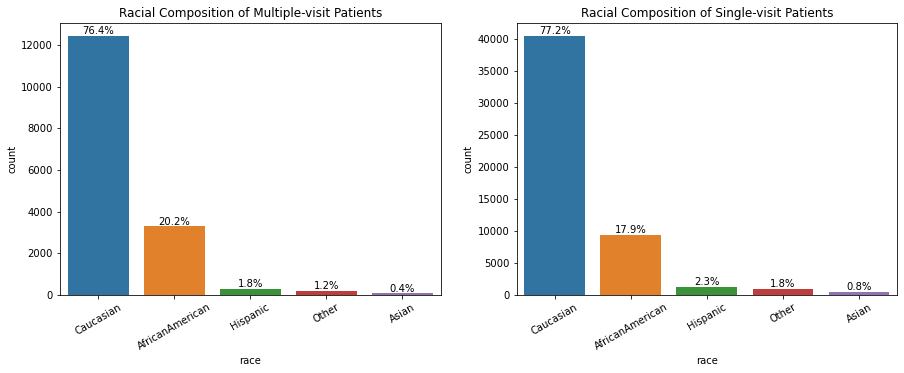

In [43]:
fig, axes = plt.subplots(1,2, figsize= (15,5), sharey=False)
plt.xticks(rotation=30)

races = ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Other','Asian']

m = sns.countplot(ax=axes[0], x='race', data=repeat_p, order=races)
m.set_title('Racial Composition of Multiple-visit Patients')
m.set_xticklabels(m.get_xticklabels(),rotation = 30);

for cont in m.containers:
    labels = [f'{h/repeat_p.race.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    m.bar_label(cont, labels=labels, label_type='edge')
    
s = sns.countplot(ax=axes[1],x='race',data=single_p, order=races)
s.set_title('Racial Composition of Single-visit Patients');
s.set_xticklabels(s.get_xticklabels(),rotation = 30);

for cont in s.containers:
    labels = [f'{h/single_p.race.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    s.bar_label(cont, labels=labels, label_type='edge')

In [44]:
single_p['race'].value_counts(normalize=True).to_frame()

,race
Caucasian,0.771824
AfricanAmerican,0.179121
Hispanic,0.022713
Other,0.018395
Asian,0.007947


In [45]:
repeat_p['race'].value_counts(normalize=True).to_frame()

,race
Caucasian,0.763943
AfricanAmerican,0.201966
Hispanic,0.017690
Other,0.012162
Asian,0.004238


In [46]:
repeat_p['gender'].value_counts(normalize=True).to_frame()

,gender
Female,0.550123
Male,0.449877


In [47]:
single_p['gender'].value_counts(normalize=True).to_frame()

,gender
Female,0.527717
Male,0.472264
Unknown/Invalid,0.000019


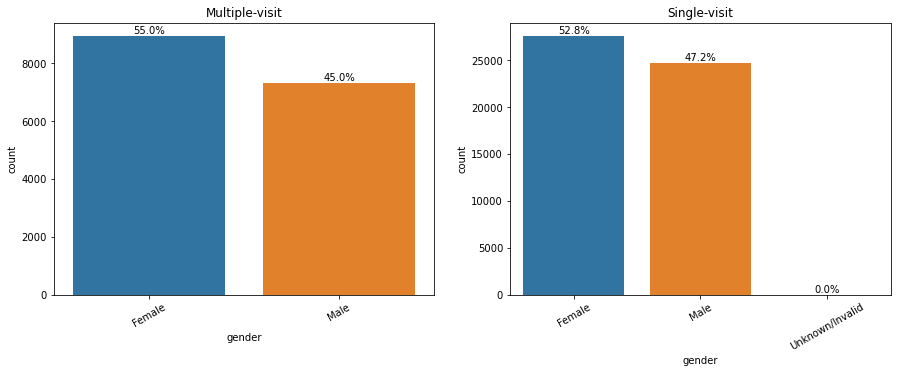

In [48]:
fig, axes = plt.subplots(1,2, figsize= (15,5), sharey=False)
plt.xticks(rotation=30)


m = sns.countplot(ax=axes[0],x='gender',data=repeat_p)
m.set_title('Multiple-visit')
m.set_xticklabels(m.get_xticklabels(),rotation = 30);

for cont in m.containers:    
    labels = [f'{h/repeat_p.gender.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    m.bar_label(cont, labels=labels, label_type='edge')

s = sns.countplot(ax=axes[1],x='gender',data=single_p)
s.set_title('Single-visit');
s.set_xticklabels(s.get_xticklabels(),rotation = 30);

for cont in s.containers:
    labels = [f'{h/single_p.gender.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    s.bar_label(cont, labels=labels, label_type='edge')


In [49]:
DM['readmitted'].value_counts()

NO     52338
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [50]:
DM['readmitted'] = DM['readmitted'].replace(regex={r'.\d\d':'Yes', 'NO':'No'})

In [51]:
DM.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,10-20,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,20-30,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,30-40,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,No


In [52]:
DM['diabetesMed'].value_counts()

Yes    75351
No     22702
Name: diabetesMed, dtype: int64

In [53]:
DM['change'].value_counts()

No    52774
Ch    45279
Name: change, dtype: int64

Here I see that in the 22,702 encounters, no diabetic medications were adminstered which confirms my work earlier. This column along with "change" column is just information repetition, which may not help my classification model. I will explore them for insights now, however.

In [54]:
DM['readmitted'].value_counts(normalize=True)

No     0.533773
Yes    0.466227
Name: readmitted, dtype: float64

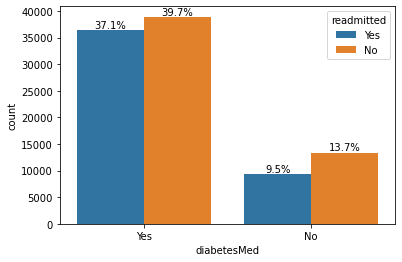

In [55]:
g = sns.countplot(x= 'diabetesMed', data= DM, hue= 'readmitted')
for cont in g.containers:
    labels = [f'{h/DM.readmitted.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    g.bar_label(cont, labels=labels, label_type='edge')

Of the encounters with patients on diabetic medication, ~48% were readmitted in less or greater than 30
days.Whereas in the encounters with patients not on diabetic medication, ~41% were readmitted in less or greater 
than 30 days.

In [56]:
DM['gender'].value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

In [57]:
i = DM[DM['gender'] == 'Unknown/Invalid'].index #dropping unknown/invalide gender row
DM = DM.drop(i)

In [58]:
DM['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

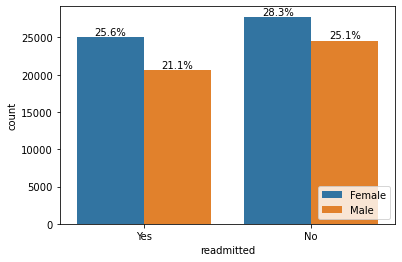

In [59]:
g = sns.countplot(x= 'readmitted', data= DM, hue= 'gender')
for cont in g.containers:    
    labels = [f'{h/DM.gender.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    g.bar_label(cont, labels=labels, label_type='edge')
    
plt.legend(loc= 'lower right')    
plt.show()

In [60]:
DM.shape

(98052, 44)

In [61]:
DM_DIAG = DM[['diag_1','diag_2','diag_3']]
DM_DIAG.shape

(98052, 3)

In [62]:
#DM_DIAG['diag_1'].unique()

In [63]:
#DM_DIAG['diag_2'].values

In [64]:
#DM_DIAG['diag_3'].values

In [65]:
DM_DIAG['diag_1'] = DM_DIAG['diag_1'].replace(regex={r'^[A-Z]\d{2}':'0'})
DM_DIAG['diag_2'] = DM_DIAG['diag_2'].replace(regex={r'^[A-Z]\d{2}':'0'})
DM_DIAG['diag_3'] = DM_DIAG['diag_3'].replace(regex={r'^[A-Z]\d{2}':'0'})

In [66]:
#sorted(DM_DIAG['diag_1'].unique())

In [67]:
#sorted(DM_DIAG['diag_2'].unique())

In [68]:
#sorted(DM_DIAG['diag_3'].unique())

In [69]:
for col in DM_DIAG.columns:    
    for val in DM_DIAG[col].values:
        if 0 < float(val) < 140:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 1683
        if 139 < float(val) < 240:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 2536
        if 239 < float(val) < 250:            
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 1851
        if 250 <= float(val) <= 250.99:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 5747
        if 251 <= float(val) < 280:            
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 1851    
        if 279 < float(val) < 290:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 652 
        if 289 < float(val) < 320:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 1544    
        if 319 < float(val) < 390:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 634
        if 389 < float(val) < 460:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 21411                   
        if 459 < float(val) < 520:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 9490            
        if 519 < float(val) < 580:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 6485
        if 579 < float(val) < 630:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 3435 
        if 629 < float(val) < 680:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 586
        if 679 < float(val) < 710:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 1846
        if 709 < float(val) < 740:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 4076
        if 739 < float(val) < 760:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 41 
        if 779 < float(val) < 800:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 2136
        if 799 < float(val) < 1000:
            DM_DIAG.loc[(DM_DIAG[col] == val), col ] = 4697               

In [70]:
DM_DIAG['diag_1'].value_counts(normalize=True).head(8)

21411    0.301157
9490     0.102935
6485     0.091054
5747     0.081232
3435     0.079937
2136     0.075746
4697     0.068362
4076     0.048331
Name: diag_1, dtype: float64

In [71]:
DM_DIAG['diag_2'].value_counts(normalize=True).head(8)

21411    0.312100
3435     0.125678
5747     0.120977
9490     0.102048
1851     0.080916
2136     0.045812
6485     0.039265
1846     0.035410
Name: diag_2, dtype: float64

In [72]:
DM_DIAG['diag_3'].value_counts(normalize=True).head(8)

21411    0.298352
5747     0.170267
3435     0.108473
1851     0.091543
9490     0.067576
2136     0.045007
0        0.038316
6485     0.035695
Name: diag_3, dtype: float64

In [73]:
decoded_Df = DM_DIAG[['diag_1','diag_2','diag_3']]
decoded_Df.head()

,diag_1,diag_2,diag_3
1,1851,5747,1851
2,3435,5747,0
3,1683,5747,21411
4,2536,2536,5747
5,21411,21411,5747


In [74]:
decoded_Df['diag_2'].unique()

array([5747, 2536, 21411, 9490, 3435, 4697, 4076, 1683, 1851, 6485, 1846,
       '0', 2136, 1544, '00', 634], dtype=object)

In [75]:
named_df = decoded_Df.replace({21411:'Circulatory', 9490:'Respiratory' , 6485:'Digestive', 5747:'DiabetesMellitus(DM)'
                              , 4697:'Injury/Poisoning', 4076:'MS/Connective', 3435:'Genitourinary'
                              , 2536:'Neoplasms', 2136:'ill-defined', 1851:'Endocrine(no DM)', 1846:'Skin/Subcutaneous'
                               , 1683:'Infection/Parasite',1544:'Mental', 918:'Other', 652:'Other',634:'Other', 
                               586:'Other', 41:'Other','0':'Other', '00':'Other'
                              })
named_df.head()

,diag_1,diag_2,diag_3
1,Endocrine(no DM),DiabetesMellitus(DM),Endocrine(no DM)
2,Genitourinary,DiabetesMellitus(DM),Other
3,Infection/Parasite,DiabetesMellitus(DM),Circulatory
4,Neoplasms,Neoplasms,DiabetesMellitus(DM)
5,Circulatory,Circulatory,DiabetesMellitus(DM)


In [76]:
named_df['diag_1'].value_counts(normalize=True).head(14)

Circulatory             0.301157
Respiratory             0.102935
Digestive               0.091054
DiabetesMellitus(DM)    0.081232
Genitourinary           0.079937
ill-defined             0.075746
Injury/Poisoning        0.068362
MS/Connective           0.048331
Neoplasms               0.033778
Infection/Parasite      0.027944
Endocrine(no DM)        0.026435
Skin/Subcutaneous       0.024864
Mental                  0.021876
Other                   0.016348
Name: diag_1, dtype: float64

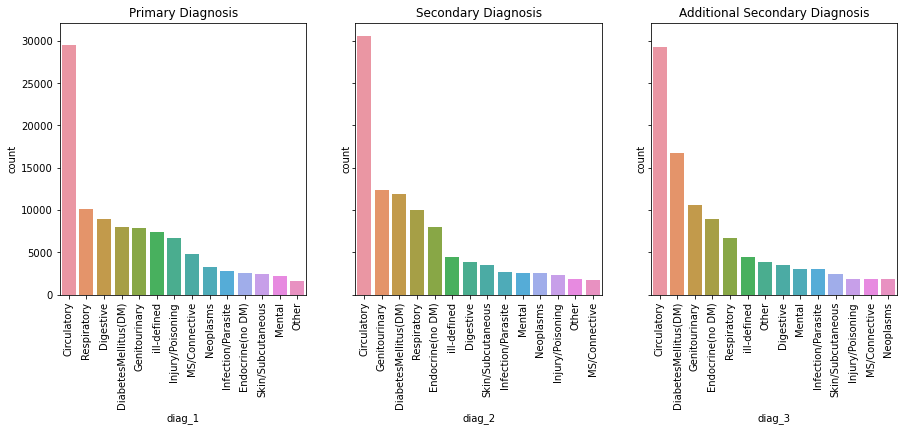

In [77]:
fig, axes = plt.subplots(1,3, figsize= (15,5), sharey=True)

g = sns.countplot(ax=axes[0], x= 'diag_1', data = named_df, order = named_df['diag_1'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_title('Primary Diagnosis')


g = sns.countplot(ax=axes[1], x= 'diag_2', data = named_df, order = named_df['diag_2'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_title('Secondary Diagnosis')

g = sns.countplot(ax=axes[2], x= 'diag_3', data = named_df, order = named_df['diag_3'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set_title('Additional Secondary Diagnosis');

In [78]:
change = DM[['change', 'readmitted']]
DM.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,10-20,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,20-30,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,30-40,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,40-50,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,50-60,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes


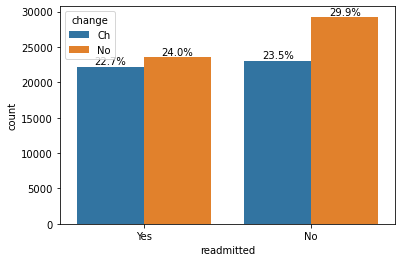

In [79]:
c = sns.countplot(x='readmitted', data=change, hue='change')

for cont in c.containers:    
    labels = [f'{h/change.change.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in cont]
    c.bar_label(cont, labels=labels, label_type='edge')
#plt.legend(['readmitted', 'non-readmitted'], loc='best');

Here in line with my previous finding, encounters were less likely to be readmitted when there is no change in
medication (change as in dosage or generic name)

In [80]:
DM['number_diagnoses'].value_counts(normalize=True).to_frame()

,number_diagnoses
9,0.496543
5,0.108024
8,0.105944
7,0.103812
6,0.101864
4,0.054665
3,0.028057
16,0.000408
13,0.000163
10,0.000163


In [81]:
lows = DM[DM['number_diagnoses'].isin([3,4,5,6,7,8,9])]
highs = DM[~DM['number_diagnoses'].isin([3,4,5,6,7,8,9])]
print(lows.shape)
print(highs.shape)

(97945, 44)
(107, 44)


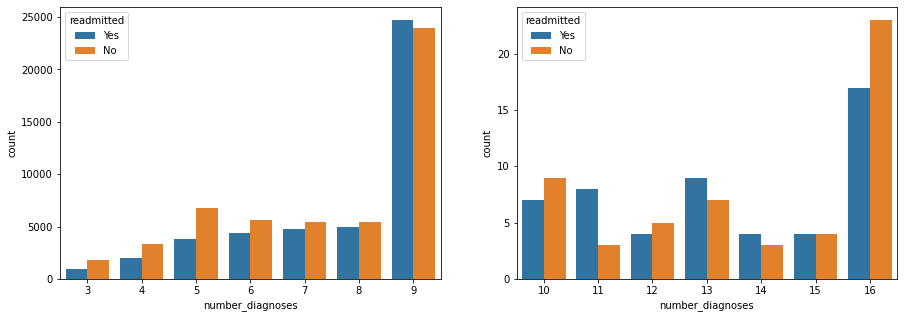

In [82]:
fig, axes = plt.subplots(1,2, figsize= (15,5), sharey=False)

lows = sns.countplot(ax=axes[0],x='number_diagnoses', data=DM, hue= 'readmitted',order=[3,4,5,6,7,8,9])
highs = sns.countplot(ax=axes[1],x='number_diagnoses', data=DM, hue= 'readmitted',order=[10,11,12,13,14,15,16])


It is presumed that the more diagnoses,the more morbidity(sickness) the patient has. We can see in encounters with
high diagnoses (9,11,13,14) being readmitted than not. Whereas, in encounters with 8 
and fewer diagnoses less patients were readmitted. Important to note here is that, there were only 107 encounters
with higher than 9 diagnoses. 9 diagnoses being the dominant with about ~49% of encounters.

In [83]:
DM['age'].value_counts(normalize=True).to_frame()

,age
70-80,0.258077
60-70,0.222423
80-90,0.170338
50-60,0.170287
40-50,0.094491
30-40,0.036185
90-100,0.027710
20-30,0.015074
10-20,0.004753
0-10,0.000663


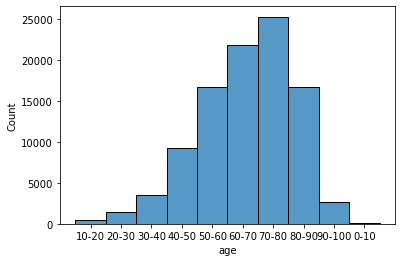

In [84]:
a = sns.histplot(x='age', data=DM) #age distribution

About ~48% of the encounters are in the age group 60-80

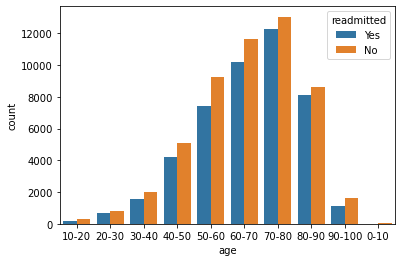

In [85]:
ag = sns.countplot(x='age', data=DM, hue= 'readmitted')

In [86]:
DM.shape

(98052, 44)

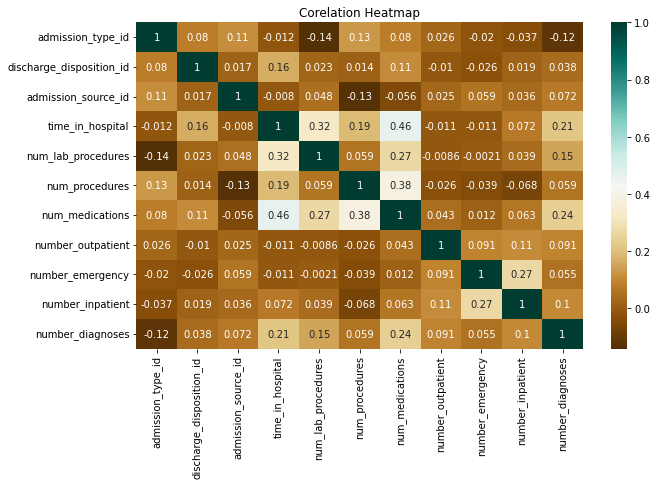

In [87]:
plt.figure(figsize=(10,6))
corr = sns.heatmap(DM.iloc[:, 2:].corr(), annot=True ,cmap='BrBG')
corr.set_title('Corelation Heatmap');

In [88]:
named_df.shape

(98052, 3)

In [89]:
named_df.head()

,diag_1,diag_2,diag_3
1,Endocrine(no DM),DiabetesMellitus(DM),Endocrine(no DM)
2,Genitourinary,DiabetesMellitus(DM),Other
3,Infection/Parasite,DiabetesMellitus(DM),Circulatory
4,Neoplasms,Neoplasms,DiabetesMellitus(DM)
5,Circulatory,Circulatory,DiabetesMellitus(DM)


In [90]:
nnamed_df = named_df.rename(columns={'diag_1':'ndiag_1', 'diag_2':'ndiag_2','diag_3':'ndiag_3'})
nnamed_df.shape

(98052, 3)

In [91]:
DM = pd.concat([DM,nnamed_df], axis=1)
DM.shape

(98052, 47)

In [92]:
repeat_p = DM[DM['patient_nbr'].isin(repeat_patients.index)].drop_duplicates(subset=['patient_nbr']
                                                                                     ,keep='first')
single_p = DM[DM['patient_nbr'].isin(single_vist.index)].drop_duplicates(subset=['patient_nbr']
                                                                                     ,keep='first')
repeat_p['encounter_id'].nunique()

16280

In [93]:
DM['patient_nbr'].nunique()

68629

In [94]:
DM.shape

(98052, 47)

In [95]:
final_DM = pd.concat([single_p, repeat_p])
final_DM.shape

(68629, 47)

In [96]:
final_DM.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,ndiag_1,ndiag_2,ndiag_3
1,149190,55629189,Caucasian,Female,10-20,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,Yes,Endocrine(no DM),DiabetesMellitus(DM),Endocrine(no DM)
2,64410,86047875,AfricanAmerican,Female,20-30,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Genitourinary,DiabetesMellitus(DM),Other
3,500364,82442376,Caucasian,Male,30-40,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,No,Infection/Parasite,DiabetesMellitus(DM),Circulatory
4,16680,42519267,Caucasian,Male,40-50,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,No,Neoplasms,Neoplasms,DiabetesMellitus(DM)
5,35754,82637451,Caucasian,Male,50-60,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes,Circulatory,Circulatory,DiabetesMellitus(DM)


In [97]:
final_DM.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'ndiag_1', 'ndiag_2', 'ndiag_3'],
      dtype='object')

In [98]:
final_DM = final_DM.drop(columns=['encounter_id', 'patient_nbr','diag_1', 'diag_2', 'diag_3','acetohexamide',
                                 'tolbutamide','acarbose','miglitol', 'troglitazone', 'tolazamide',
                                 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                                  'metformin-pioglitazone','repaglinide', 'nateglinide','chlorpropamide'])
#dropping features of drugs that were not given for >98$ cases/encounters, and features redundant &
#less useful for our model

In [99]:
final_DM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68629 entries, 1 to 101355
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      68629 non-null  object
 1   gender                    68629 non-null  object
 2   age                       68629 non-null  object
 3   admission_type_id         68629 non-null  int64 
 4   discharge_disposition_id  68629 non-null  int64 
 5   admission_source_id       68629 non-null  int64 
 6   time_in_hospital          68629 non-null  int64 
 7   num_lab_procedures        68629 non-null  int64 
 8   num_procedures            68629 non-null  int64 
 9   num_medications           68629 non-null  int64 
 10  number_outpatient         68629 non-null  int64 
 11  number_emergency          68629 non-null  int64 
 12  number_inpatient          68629 non-null  int64 
 13  number_diagnoses          68629 non-null  int64 
 14  max_glu_serum        

In [100]:
drgs = final_DM.columns[16:23]  #selecting the features of the medications/drugs

drugs_ = {}
for col in drgs:
    drugs_[col] = final_DM[col].value_counts(normalize=True)

drugs_N = pd.DataFrame(drugs_)
drugs_N.T

,Down,No,Steady,Up
metformin,0.006032,0.790526,0.191887,0.011555
glimepiride,0.001938,0.947719,0.047050,0.003293
glipizide,0.005304,0.871891,0.114558,0.008247
glyburide,0.005858,0.890134,0.095208,0.008801
pioglitazone,0.001151,0.925338,0.070976,0.002535
rosiglitazone,0.001049,0.933774,0.063239,0.001938
insulin,0.105495,0.491775,0.305571,0.097160


In [101]:
final_DM.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,ndiag_1,ndiag_2,ndiag_3
1,Caucasian,Female,10-20,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,Up,Ch,Yes,Yes,Endocrine(no DM),DiabetesMellitus(DM),Endocrine(no DM)
2,AfricanAmerican,Female,20-30,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,Steady,No,No,No,No,No,Yes,No,Genitourinary,DiabetesMellitus(DM),Other
3,Caucasian,Male,30-40,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,Up,Ch,Yes,No,Infection/Parasite,DiabetesMellitus(DM),Circulatory
4,Caucasian,Male,40-50,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,Steady,No,No,No,Steady,Ch,Yes,No,Neoplasms,Neoplasms,DiabetesMellitus(DM)
5,Caucasian,Male,50-60,2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,Steady,No,Yes,Yes,Circulatory,Circulatory,DiabetesMellitus(DM)


In [102]:
final_DM['A1Cresult'].value_counts(normalize=True).to_frame()

,A1Cresult
None,0.821052
>8,0.084410
Norm,0.053665
>7,0.040872


In [103]:
final_DM['max_glu_serum'].value_counts(normalize=True).to_frame()

,max_glu_serum
None,0.951056
Norm,0.024567
>200,0.013682
>300,0.010695


In [104]:
final_DM.to_csv('../raw_data/final_DM.csv')

In [105]:
final_DM.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,ndiag_1,ndiag_2,ndiag_3
1,Caucasian,Female,10-20,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,Up,Ch,Yes,Yes,Endocrine(no DM),DiabetesMellitus(DM),Endocrine(no DM)
2,AfricanAmerican,Female,20-30,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,Steady,No,No,No,No,No,Yes,No,Genitourinary,DiabetesMellitus(DM),Other
3,Caucasian,Male,30-40,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,Up,Ch,Yes,No,Infection/Parasite,DiabetesMellitus(DM),Circulatory
4,Caucasian,Male,40-50,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,Steady,No,No,No,Steady,Ch,Yes,No,Neoplasms,Neoplasms,DiabetesMellitus(DM)
5,Caucasian,Male,50-60,2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,Steady,No,Yes,Yes,Circulatory,Circulatory,DiabetesMellitus(DM)


In [106]:
final_DM.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'ndiag_1', 'ndiag_2', 'ndiag_3'],
      dtype='object')

In [107]:
final_DM_nodrgs = final_DM.drop(columns=['max_glu_serum','A1Cresult','metformin','glimepiride', 'glipizide',
                                         'glyburide', 'pioglitazone','rosiglitazone', 'insulin'])
#dropping features/drugs with very low variance

In [108]:
DM_df = final_DM_nodrgs.drop(columns = ['number_outpatient', 'number_emergency','number_inpatient']) 
#dropping features with very low variance.more than 87% values are same                                     

In [109]:
DM_df.shape

(68629, 17)

In [110]:
P = ['Yes']
N = ['No']
# assigning 1s and 0s to our target value
readmit = []
for value in DM_df['readmitted'].values:
    if value in P:
        readmit.append(1)
    else:
        readmit.append(0)

In [111]:
DM_df['readmit'] = readmit
DM_df[['readmit']].head()

,readmit
1,1
2,0
3,0
4,0
5,1


In [112]:
DM_df.columns


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'change', 'diabetesMed', 'readmitted', 'ndiag_1',
       'ndiag_2', 'ndiag_3', 'readmit'],
      dtype='object')

In [113]:
DM_df.shape

(68629, 18)

In [114]:
DM_df = DM_df.drop(columns=['readmitted'])

In [115]:
#DM_df = DM_df.drop(columns=['ndiag_3']) #dropping to help see model perf improv.

In [116]:
#DM_df = DM_df.loc[~DM_df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [117]:
DM_df.shape

(68629, 17)

In [118]:
DM_df.to_csv('../raw_data/DM_df.csv', index=False)

In [119]:
DM_df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'change', 'diabetesMed', 'ndiag_1', 'ndiag_2',
       'ndiag_3', 'readmit'],
      dtype='object')